In [1]:
from sksurv.datasets import load_veterans_lung_cancer


In [2]:
data_x, data_y = load_veterans_lung_cancer()
data_y


array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

In [3]:
import pandas as pd

pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

,Status,Survival_in_days
1,True,8.0
2,True,10.0
3,True,20.0
4,False,25.0
5,True,59.0


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y["Status"], data_y["Survival_in_days"], conf_type="log-log"
)

conf_int

array([[9.42893109e-01, 9.33651832e-01, 9.24082397e-01, 9.14545373e-01,
        8.86631237e-01, 8.50914573e-01, 8.33553510e-01, 8.24974931e-01,
        8.07998113e-01, 7.91236583e-01, 7.74665806e-01, 7.66445670e-01,
        7.42021832e-01, 7.25919679e-01, 7.09948861e-01, 6.94100247e-01,
        6.86219301e-01, 6.70539844e-01, 6.47215699e-01, 6.39395710e-01,
        6.31600770e-01, 6.16083777e-01, 6.00660586e-01, 5.92983030e-01,
        5.85327622e-01, 5.77693992e-01, 5.70081792e-01, 5.62490701e-01,
        5.54920421e-01, 5.47370673e-01, 5.39841201e-01, 5.32331768e-01,
        5.09921593e-01, 4.87684878e-01, 4.80310501e-01, 4.65617850e-01,
        4.58299394e-01, 4.50999416e-01, 4.43717858e-01, 4.36454671e-01,
        4.29209820e-01, 4.21983281e-01, 4.07585108e-01, 4.00413485e-01,
        4.00413485e-01, 3.93130372e-01, 3.85866971e-01, 3.78485275e-01,
        3.71124858e-01, 3.56468033e-01, 3.56468033e-01, 3.41595796e-01,
        3.34194691e-01, 3.26651973e-01, 3.18959682e-01, 3.112954

Text(0.5, 0, 'time $t$')

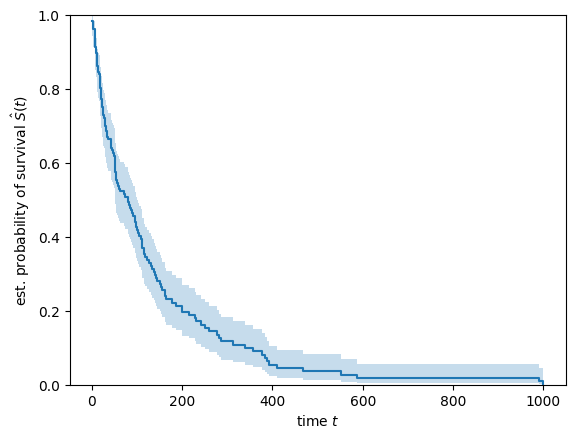

In [9]:
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

standard
[  3.   4.   7.   8.  10.  11.  12.  13.  16.  18.  20.  21.  22.  25.
  27.  30.  31.  35.  42.  51.  52.  54.  56.  59.  63.  72.  82.  92.
  95.  97. 100. 103. 105. 110. 117. 118. 122. 123. 126. 132. 139. 143.
 144. 151. 153. 156. 162. 177. 182. 200. 216. 228. 250. 260. 278. 287.
 314. 384. 392. 411. 553.]
test
[  1.   2.   7.   8.  13.  15.  18.  19.  20.  21.  24.  25.  29.  30.
  31.  33.  36.  43.  44.  45.  48.  49.  51.  52.  53.  61.  73.  80.
  83.  84.  87.  90.  95.  99. 103. 111. 112. 133. 140. 164. 186. 201.
 231. 242. 283. 340. 357. 378. 389. 467. 587. 991. 999.]


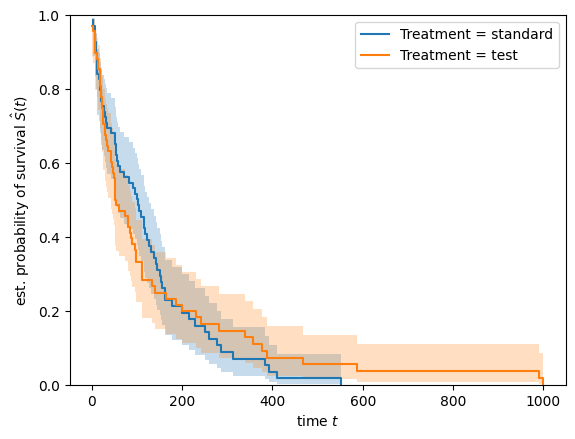

In [13]:
for treatment_type in ("standard", "test"):
    mask_treat = data_x["Treatment"] == treatment_type
    time_treatment, survival_prob_treatment, conf_int = kaplan_meier_estimator(
        data_y["Status"][mask_treat],
        data_y["Survival_in_days"][mask_treat],
        conf_type="log-log",
    )

    print(treatment_type)
    print(time_treatment)

    plt.step(time_treatment, survival_prob_treatment, where="post", label=f"Treatment = {treatment_type}")
    plt.fill_between(time_treatment, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

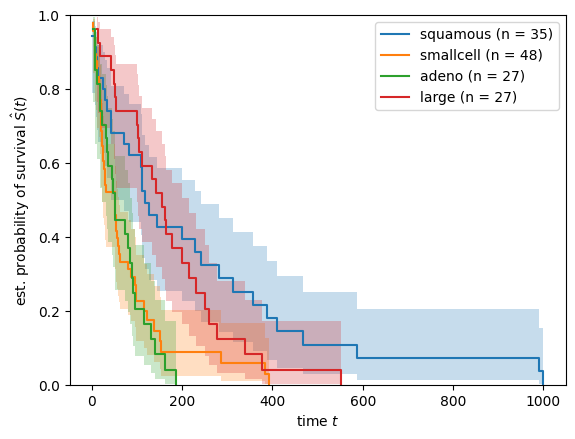

In [12]:
for value in data_x["Celltype"].unique():
    mask = data_x["Celltype"] == value
    time_cell, survival_prob_cell, conf_int = kaplan_meier_estimator(
        data_y["Status"][mask], data_y["Survival_in_days"][mask], conf_type="log-log"
    )
    plt.step(time_cell, survival_prob_cell, where="post", label=f"{value} (n = {mask.sum()})")
    plt.fill_between(time_cell, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")